<a href="https://colab.research.google.com/github/SK-15/Image-Classifier/blob/master/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image cassification Project 

A image classification project on CIFAR-10 dataset. In this project convalutional neural networks are employed using tensorflow library  

In [2]:
# importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers , models

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [14]:
# downloading data and splitting it into training and testing data
(train_X , train_y) , (test_X , test_y) = datasets.cifar10.load_data()

train_X = train_X.reshape(train_X.shape[0], 32, 32, 3)
test_X = test_X.reshape(test_X.shape[0], 32, 32, 3)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.0
test_X = test_X / 255.0

Now lets plot 25 images from dataset, one from each class

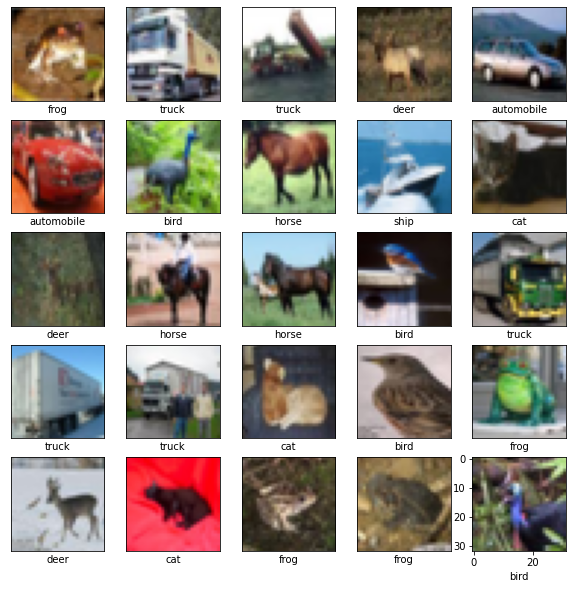

<Figure size 432x288 with 0 Axes>

In [5]:
classes = ['airplanes','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize = (10,10))
for i in range(25):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1)
  plt.imshow(train_X[i])
  plt.xlabel(classes[train_y[i][0]])
plt.show()
plt.tight_layout()

The lines of code below defines the convolutional base using a common pattern: a stack of convolutional layers and max pooling layers.

A CNN takes takes inpus as (image_hieght,image_width,colour_channel). In this case of Cifar-10 data input shape is (32,32,3).

To complete our model, we are going to feed our output to dense layer to perform clasification.

Flatten is used to make our 3D output of CNN to 1D as dense layer takes vector as output.

Dropout is used prevent overfitting, it ignores randomly selected nuerons during train.  

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu', input_shape = (32,32,3)))
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

In [15]:
epochs = 30
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])
history = model.fit(train_X, train_y, epochs = 30, validation_data = (test_X, test_y))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5116 - accuracy: 0.4481 - val_loss: 1.0825 - val_accuracy: 0.6177
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1221 - accuracy: 0.6017 - val_loss: 0.9627 - val_accuracy: 0.6605
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9908 - accuracy: 0.6505 - val_loss: 0.8386 - val_accuracy: 0.7057
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9134 - accuracy: 0.6804 - val_loss: 0.8307 - val_accuracy: 0.7078
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8549 - accuracy: 0.6962 - val_loss: 0.7811 - val_accuracy: 0.7322
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8076 - accuracy: 0.7165 - val_loss: 0.7527 - val_accuracy: 0.7409
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7708 - accuracy: 0.7266 - val_loss: 0.7224 - val_accuracy:

Here I ran model for 30 epochs with "Adam" optimizer and loss function "SparseCategoricalCrossentropy" used for multiple classifications. 

This simple CNN model gave accuracy of 75% on validation data.

Below are two graphs to show trends of accuracy and loss on both training data and validation data.


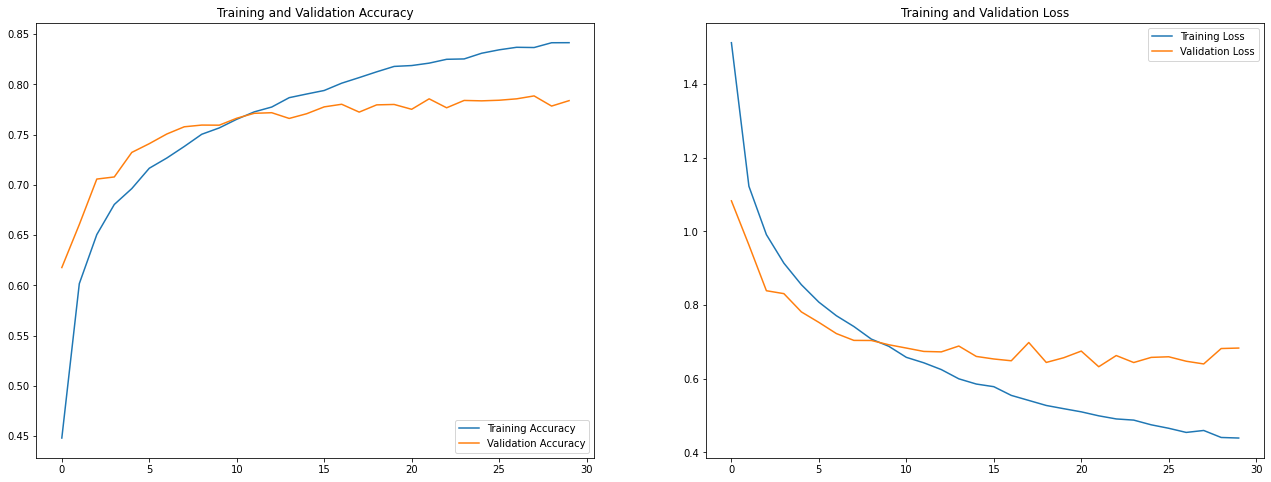

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
